<a href="https://colab.research.google.com/github/comojin1994/Machine_Learning/blob/master/Regression/KBO_Batter_OPS_Estimate_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls

drive  sample_data


In [3]:
%cd ./drive/My\ Drive/Deep_learning/Dacon

/content/drive/My Drive/Deep_learning/Dacon


In [4]:
!ls

6th_data.zip  KBO_Batter_OPS_Estimate.ipynb


In [5]:
!unzip 6th_data.zip

Archive:  6th_data.zip
  inflating: Pre_Season_Batter.csv   
  inflating: Regular_Season_Batter.csv  
  inflating: Regular_Season_Batter_Day_by_Day_b4.csv  
  inflating: submission.csv          


In [6]:
!ls

6th_data.zip		       Regular_Season_Batter.csv
KBO_Batter_OPS_Estimate.ipynb  Regular_Season_Batter_Day_by_Day_b4.csv
Pre_Season_Batter.csv	       submission.csv


In [0]:
import pandas as pd
import numpy as np

In [0]:
regular_seanson_df = pd.read_csv('./Regular_Season_Batter.csv')

In [9]:
pd.DataFrame(regular_seanson_df.isna().sum()).transpose()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,24,0,802,0,802,0,1067,26


In [12]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = regular_seanson_df.select_dtypes(include=numerics).columns

regular_seanson_df.loc[regular_seanson_df[num_cols].isna().sum(axis=1) > 0, num_cols].head()

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
18,138,2013,NaN,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,NaN
175,21,2000,NaN,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,NaN
200,24,2002,NaN,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN,NaN,0,NaN
265,31,2007,NaN,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,NaN
385,45,2007,NaN,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN,NaN,0,NaN


In [32]:
regular_seanson_df[regular_seanson_df.select_dtypes(include=numerics).columns].fillna(0)
regular_seanson_df.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,3,1,30,7,0,0,13,2,28,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,4,2,101,27,4,3,40,5,58,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,2,1,26,7,0,0,8,2,30,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


In [35]:
day_by_day_df = pd.read_csv('./Regular_Season_Batter_Day_by_Day_b4.csv')
day_by_day_df[day_by_day_df.select_dtypes(include=numerics).columns].fillna(0)
day_by_day_df.head()

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,0,0,0,0,1,0,1,0,0.333,2018
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,0,0,0,0,0,0,1,0,0.143,2018
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,0,0,0,0,0,0,0,0,0.167,2018
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,0,1,0,0,0,0,0,0,0.176,2018
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,0,3,0,0,0,0,0,1,0.190,2018


In [39]:
preseason_df = pd.read_csv('./Pre_Season_Batter.csv')
preseason_df[preseason_df.select_dtypes(include=numerics).columns].fillna(0)
preseason_df.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,0,1,11,5,0,0,2,0,3,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,0,0,0,1,0,1,0,2,1,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,0,0,3,1,3,0,4,1,9,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,1,0,9,2,1,2,0,1,10,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


In [41]:
not_num_cols = [x for x in regular_seanson_df.columns if x not in num_cols]

regular_seanson_df.loc[regular_seanson_df[not_num_cols].isna().sum(axis=1) > 0, not_num_cols].head()

,batter_name,team,height/weight,year_born,position,career,starting_salary
0,가르시아,LG,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN
12,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN
13,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN
14,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN
15,백승룡,한화,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN


In [42]:
drop_idx = regular_seanson_df.loc[((regular_seanson_df['H']>0)&(regular_seanson_df['SLG']==0))|
                                  (((regular_seanson_df['H']>0)|(regular_seanson_df['BB']>0)|(regular_seanson_df['HBP']>0))&
                                  (regular_seanson_df['OBP']==0))].index
drop_idx                                

Int64Index([478, 746, 1457, 1674, 1675, 1934, 1935], dtype='int64')

In [0]:
regular_seanson_df = regular_seanson_df.drop(drop_idx).reset_index(drop=True)

In [44]:
regular_seanson_df.shape

(2447, 29)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

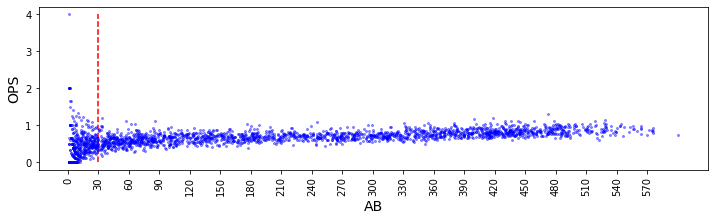

In [47]:
plt.figure(figsize=(12, 3))
plt.plot('AB', 'OPS', data=regular_seanson_df, linestyle='none', marker='o', markersize=2, color='blue', alpha=0.4)
plt.xlabel('AB', fontsize=14)
plt.ylabel('OPS', fontsize=14)
plt.xticks(list(range(min(regular_seanson_df['AB']), max(regular_seanson_df['AB']), 30)), rotation=90)
plt.vlines(30, ymin=min(regular_seanson_df['OPS']), ymax=max(regular_seanson_df['OPS']),
           linestyles='dashed', colors='r')
plt.show()

In [0]:
Q1 = regular_seanson_df['OPS'].quantile(0.25)
Q3 = regular_seanson_df['OPS'].quantile(0.75)
IQR = Q3 - Q1

In [60]:
regular_seanson_df.loc[(regular_seanson_df['OPS'] < (Q1 - 1.5 * IQR))|
                       (regular_seanson_df['OPS'] > (Q3 + 1.5 * IQR))].sort_values(
                      by=['AB'], axis=0, ascending=False)[['batter_name', 'AB', 'year', 'OPS']].head(10)

,batter_name,AB,year,OPS
2329,테임즈,472,2015,1.293656
97,강정호,418,2014,1.200156
793,박병호,400,2018,1.175000
1318,유재신,33,2018,1.192000
2351,한승택,33,2013,0.165000
416,김원섭,25,2005,0.116923
610,나주환,23,2013,0.174000
1543,이여상,22,2013,0.090909
681,문규현,18,2007,0.109000
578,김회성,17,2010,0.105000


In [0]:
def lag_function(df, var_name, past):
  df.reset_index(drop=True, inplace=True)

  df['lag'+str(past)+'_'+var_name] = np.nan
  df['lag'+str(past)+'_'+'AB'] = np.nan

  for col in ['AB', var_name]:
    for i in range(0, max(df.index) + 1):
      val = df.loc[(df['batter_name'] == df['batter_name'][i]) &
                   (df['year'] == df['year'][i] - past), col]
      if(len(val) != 0): df.loc[i, 'lag'+str(past)+'_'+col] = val.iloc[0]

  df.loc[df['lag'+str(past)+'_'+'AB']<30, 'lag'+str(past)+'_'+var_name] = np.nan
  df.drop('lag'+str(past)+'_'+'AB', axis=1,inplace=True)

  return df                  

In [0]:
numeric_cols = list(regular_seanson_df.select_dtypes(include=numerics).drop(
    ['batter_id', 'year', 'OPS', 'SLG'], axis=1).columns)
regular_season_temp = regular_seanson_df[numeric_cols + ['year', 'batter_name']].copy()
regular_season_temp = regular_season_temp.loc[regular_season_temp['AB'] >= 30]

In [0]:
for col in numeric_cols:
  regular_season_temp = lag_function(regular_season_temp, col, 1)

In [70]:
numeric_cols.remove('OBP')

ValueError: ignored

In [0]:
regular_season_temp.drop(numeric_cols, axis=1, inplace=True)

In [0]:
corr_matrix = regular_season_temp.corr()
corr_matrix = corr_matrix.sort_values(by='OBP', axis=0, ascending=False)

Text(0.5, 1.0, 'Diagonal Correlation HeatMap')

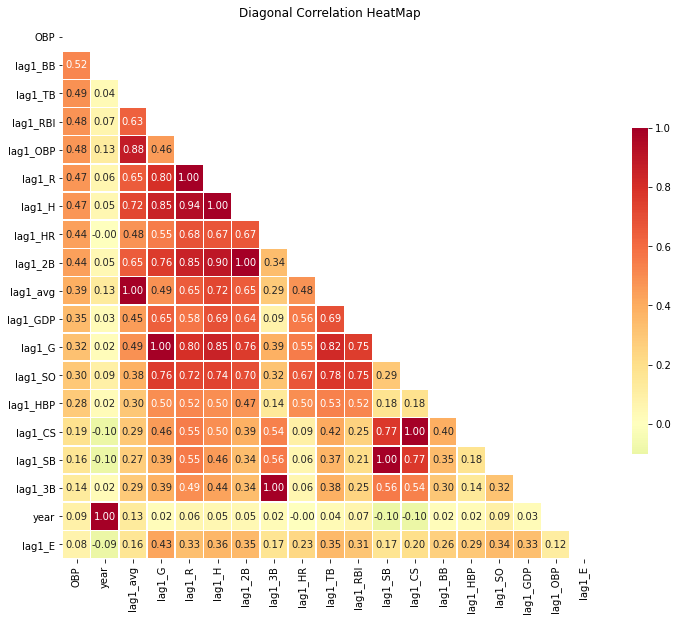

In [87]:
import seaborn as sns

f, ax = plt.subplots(figsize=(12, 12))
corr = regular_season_temp.select_dtypes(exclude=['object', 'bool']).corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(corr_matrix, mask=mask, cmap='RdYlGn_r', vmax=1,
                center=0, annot=True, fmt='.2f', square=True, linewidths=.5,
                cbar_kws={'shrink':.5})
plt.title('Diagonal Correlation HeatMap')

Text(0.5, 1.0, 'Diagonal Correlation HeatMap')

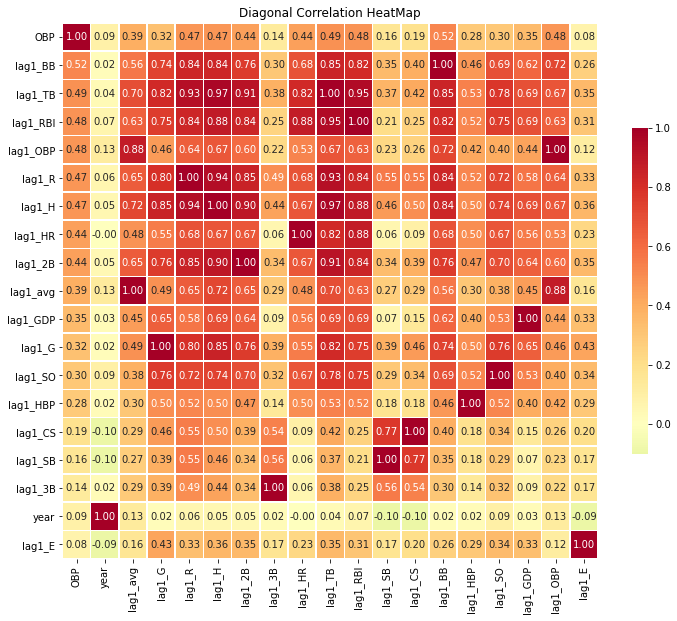

In [88]:
f, ax = plt.subplots(figsize=(12, 12))
corr = regular_season_temp.select_dtypes(exclude=['object', 'bool']).corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(corr_matrix, cmap='RdYlGn_r', vmax=1,
                center=0, annot=True, fmt='.2f', square=True, linewidths=.5,
                cbar_kws={'shrink':.5})
plt.title('Diagonal Correlation HeatMap')

In [0]:
regular_seanson_df['SF'] = regular_seanson_df[['H', 'BB', 'HBP']].sum(axis=1) / regular_seanson_df['OBP'] - regular_seanson_df[['AB', 'BB', 'HBP']].sum(axis=1)
regular_seanson_df['SF'].fillna(0, inplace=True)
regular_seanson_df['SF'] = regular_seanson_df['SF'].apply(lambda x: round(x, 0))

In [96]:
regular_seanson_df['SF_1'] = regular_seanson_df['SF'] / regular_seanson_df['AB']
regular_seanson_df_SF = regular_seanson_df[['batter_name', 'year', 'SF_1']]
regular_seanson_df_SF

,batter_name,year,SF_1
0,가르시아,2018,0.032787
1,강경학,2011,0.000000
2,강경학,2014,-0.000000
3,강경학,2015,0.009646
4,강경학,2016,0.009901
...,...,...,...
2442,황진수,2014,0.000000
2443,황진수,2015,0.000000
2444,황진수,2016,0.000000
2445,황진수,2017,0.008547


In [97]:
sum_hf_yr_OBP = day_by_day_df.loc[day_by_day_df['date']
                                  <= 7.18].groupby(['batter_name', 'year'])['AB','H','BB','HBP'].sum().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [0]:
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(regular_seanson_df_SF, how='left',
                                    on=['batter_name', 'year'])

In [100]:
sum_hf_yr_OBP.head()

,batter_name,year,AB,H,BB,HBP,SF_1
0,가르시아,2018,85,31,6,4,0.032787
1,강경학,2011,1,0,0,0,0.000000
2,강경학,2014,0,0,2,0,-0.000000
3,강경학,2015,156,39,21,2,0.009646
4,강경학,2016,81,12,6,2,0.009901


In [0]:
sum_hf_yr_OBP['SF'] = (sum_hf_yr_OBP['SF_1'] * sum_hf_yr_OBP['AB']).apply(lambda x: round(x, 0))
sum_hf_yr_OBP.drop('SF_1', axis=1, inplace=True)

In [104]:
sum_hf_yr_OBP.head()

,batter_name,year,AB,H,BB,HBP,SF
0,가르시아,2018,85,31,6,4,3.0
1,강경학,2011,1,0,0,0,0.0
2,강경학,2014,0,0,2,0,-0.0
3,강경학,2015,156,39,21,2,2.0
4,강경학,2016,81,12,6,2,1.0


In [0]:
sum_hf_yr_OBP['OBP'] = sum_hf_yr_OBP[['H', 'BB', 'HBP']].sum(axis=1)/sum_hf_yr_OBP[['AB', 'BB', 'HBP', 'SF']].sum(axis=1)
sum_hf_yr_OBP['OBP'].fillna(0, inplace=True)

In [106]:
sum_hf_yr_OBP.head()

,batter_name,year,AB,H,BB,HBP,SF,OBP
0,가르시아,2018,85,31,6,4,3.0,0.418367
1,강경학,2011,1,0,0,0,0.0,0.000000
2,강경학,2014,0,0,2,0,-0.0,1.000000
3,강경학,2015,156,39,21,2,2.0,0.342541
4,강경학,2016,81,12,6,2,1.0,0.222222


In [107]:
sum_hf_yr_OBP = sum_hf_yr_OBP[['batter_name', 'year', 'AB', 'OBP']]
sum_hf_yr_OBP

,batter_name,year,AB,OBP
0,가르시아,2018,85,0.418367
1,강경학,2011,1,0.000000
2,강경학,2014,0,1.000000
3,강경학,2015,156,0.342541
4,강경학,2016,81,0.222222
...,...,...,...,...
1381,황진수,2012,4,0.400000
1382,황진수,2013,0,0.000000
1383,황진수,2016,9,0.000000
1384,황진수,2017,71,0.316456


In [0]:
regular_seanson_df['age'] = regular_seanson_df['year'] - regular_seanson_df['year_born'].apply(lambda x: int(x[:4]))

temp_df = regular_seanson_df.loc[regular_seanson_df['AB']>=30].groupby('age').agg({'OBP':['mean', 'median']}).reset_index()

In [0]:
temp_df.columns = temp_df.columns.droplevel()

In [0]:
temp_df.columns = ['age', 'mean_OBP', 'median_OBP']

In [124]:
temp_df.head()

,age,mean_OBP,median_OBP
0,18,0.295750,0.3140
1,19,0.296261,0.2955
2,20,0.309184,0.3270
3,21,0.320382,0.3205
4,22,0.327844,0.3230


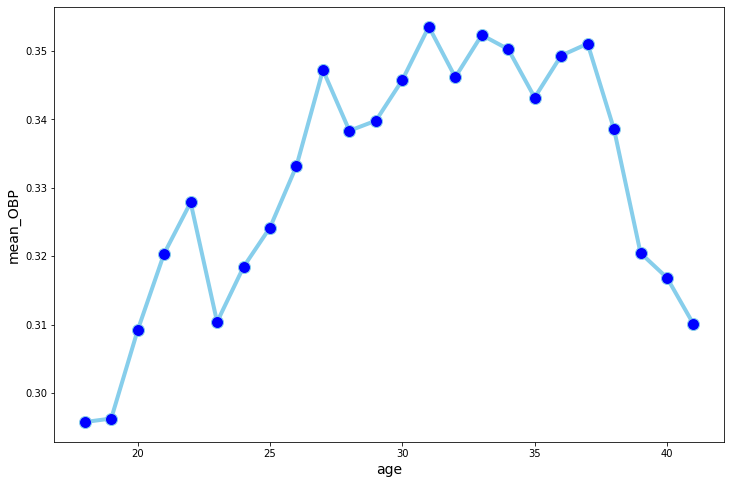

In [129]:
plt.figure(figsize=(12, 8))
plt.plot('age', 'mean_OBP', data=temp_df, marker='o', markerfacecolor='blue', markersize=12,
         color='skyblue', linewidth=4)
plt.ylabel('mean_OBP', fontsize=14)
plt.xlabel('age', fontsize=14)
plt.show()

In [0]:
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(regular_seanson_df[['batter_name', 'year', 'age']],
                                    how='left', on=['batter_name', 'year'])

In [0]:
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, 'OBP', 1)
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, 'OBP', 2)
sum_hf_yr_OBP = lag_function(sum_hf_yr_OBP, 'OBP', 3)

In [133]:
sum_hf_yr_OBP.head()

,batter_name,year,AB,OBP,age,lag1_OBP,lag2_OBP,lag3_OBP
0,가르시아,2018,85,0.418367,33,NaN,NaN,NaN
1,강경학,2011,1,0.000000,19,NaN,NaN,NaN
2,강경학,2014,0,1.000000,22,NaN,NaN,NaN
3,강경학,2015,156,0.342541,23,NaN,NaN,NaN
4,강경학,2016,81,0.222222,24,0.342541,NaN,NaN


In [134]:
round(sum_hf_yr_OBP[['lag1_OBP', 'lag2_OBP', 'lag3_OBP']].isna().sum()/sum_hf_yr_OBP.shape[0], 2)

lag1_OBP    0.41
lag2_OBP    0.54
lag3_OBP    0.61
dtype: float64

In [135]:
player_OBP_mean = regular_seanson_df.loc[regular_seanson_df['AB']>=30].groupby('batter_name')['AB', 'H', 'BB', 'HBP', 'SF'].sum().reset_index()
player_OBP_mean['mean_OBP'] = player_OBP_mean[['H', 'BB', 'HBP']].sum(axis=1)/player_OBP_mean[['AB', 'BB', 'HBP', 'SF']].sum(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [136]:
season_OBP_mean = regular_seanson_df.loc[regular_seanson_df['AB']>=30].groupby('year')['AB', 'H', 'BB', 'HBP', 'SF'].sum().reset_index()
season_OBP_mean['mean_OBP'] = season_OBP_mean[['H', 'BB', 'HBP']].sum(axis=1)/season_OBP_mean[['AB', 'BB', 'HBP', 'SF']].sum(axis=1)
season_OBP_mean = season_OBP_mean[['year', 'mean_OBP']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [137]:
sum_hf_yr_OBP = sum_hf_yr_OBP.merge(player_OBP_mean[['batter_name', 'mean_OBP']],
                                    how='left', on='batter_name')
sum_hf_yr_OBP = sum_hf_yr_OBP.loc[~sum_hf_yr_OBP['mean_OBP'].isna()].reset_index(drop=True)
sum_hf_yr_OBP.head()

,batter_name,year,AB,OBP,age,lag1_OBP,lag2_OBP,lag3_OBP,mean_OBP
0,가르시아,2018,85,0.418367,33,NaN,NaN,NaN,0.383495
1,강경학,2011,1,0.000000,19,NaN,NaN,NaN,0.337880
2,강경학,2014,0,1.000000,22,NaN,NaN,NaN,0.337880
3,강경학,2015,156,0.342541,23,NaN,NaN,NaN,0.337880
4,강경학,2016,81,0.222222,24,0.342541,NaN,NaN,0.337880


In [0]:
def lag_na_fill(data_set, var_name, past, season_var_mean_data):
  for i in range(len(data_set)):
    if (np.isnan(data_set['lag'+str(past)+'_'+var_name][i])):
      data_set.loc[i, ['lag'+str(past)+'_'+var_name]] = (data_set['mean'+'_'+var_name][i] +
       season_var_mean_data.loc[season_var_mean_data['year'] == (data_set['year'][i] - past),
       'mean_' + var_name].iloc[0]) / 2
  return (data_set)

In [0]:
sum_hf_yr_OBP = lag_na_fill(sum_hf_yr_OBP, 'OBP', 1, season_OBP_mean)
sum_hf_yr_OBP = lag_na_fill(sum_hf_yr_OBP, 'OBP', 2, season_OBP_mean)
sum_hf_yr_OBP = lag_na_fill(sum_hf_yr_OBP, 'OBP', 3, season_OBP_mean)

In [146]:
sum_hf_yr_OBP.head()

,batter_name,year,AB,OBP,age,lag1_OBP,lag2_OBP,lag3_OBP,mean_OBP
0,가르시아,2018,85,0.418367,33,0.369982,0.375910,0.373119,0.383495
1,강경학,2011,1,0.000000,19,0.347434,0.348603,0.344259,0.337880
2,강경학,2014,0,1.000000,22,0.346682,0.337511,0.343131,0.337880
3,강경학,2015,156,0.342541,23,0.353425,0.346682,0.337511,0.337880
4,강경학,2016,81,0.222222,24,0.342541,0.353425,0.346682,0.337880
